# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [20]:
# Import warnings



In [21]:
!pip install geopandas

In [22]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [23]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [24]:
# Try loading one file

df_jan = pd.read_parquet('/content/2023-1.parquet')
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [25]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [26]:
df_feb = pd.read_parquet('/content/2023-2.parquet')
df_mar = pd.read_parquet('/content/2023-3.parquet')
df_apr = pd.read_parquet('/content/2023-4.parquet')
df_may = pd.read_parquet('/content/2023-5.parquet')
df_jun = pd.read_parquet('/content/2023-6.parquet')
df_jul = pd.read_parquet('/content/2023-7.parquet')
df_aug = pd.read_parquet('/content/2023-8.parquet')
df_sep = pd.read_parquet('/content/2023-9.parquet')
df_oct = pd.read_parquet('/content/2023-10.parquet')
df_nov = pd.read_parquet('/content/2023-11.parquet')
df_dec = pd.read_parquet('/content/2023-12.parquet')


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [27]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
file_list = [f for f in os.listdir() if f.endswith('.parquet')]
final_sampled_data = pd.DataFrame()
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        # Ensure datetime column is in datetime format
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        # Create date and hour columns
        df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
        df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

        # Initialize DataFrame to store sampled data for this file
        sampled_data = pd.DataFrame()

        # Sample 5% data for each hour of each day
        for date, date_data in df.groupby('pickup_date'):
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour'] == hour]
                if len(hour_data) > 0:
                    sampled_hour_data = hour_data.sample(frac=0.01, random_state=42)
                    sampled_data = pd.concat([sampled_data, sampled_hour_data])

        # Append to final dataset
        final_sampled_data = pd.concat([final_sampled_data, sampled_data])

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        # df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [30]:
final_sampled_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
1788,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
3196699,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
1408,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3196663,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
3613,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


In [31]:
len(final_sampled_data)

383508

In [32]:
final_sampled_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,13056
trip_distance,0
RatecodeID,13056
store_and_fwd_flag,13056
PULocationID,0
DOLocationID,0
payment_type,0


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [33]:
# Store the df in csv/parquet
final_sampled_data.to_parquet('/content/final_sample_data.parquet', index=False)

In [34]:
final_sampled_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,13056
trip_distance,0
RatecodeID,13056
store_and_fwd_flag,13056
PULocationID,0
DOLocationID,0
payment_type,0


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [35]:
# Load the new data file

df = final_sampled_data

In [36]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
1788,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
3196699,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
1408,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3196663,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
3613,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383508 entries, 1788 to 3407781
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               383508 non-null  int64         
 1   tpep_pickup_datetime   383508 non-null  datetime64[us]
 2   tpep_dropoff_datetime  383508 non-null  datetime64[us]
 3   passenger_count        370452 non-null  float64       
 4   trip_distance          383508 non-null  float64       
 5   RatecodeID             370452 non-null  float64       
 6   store_and_fwd_flag     370452 non-null  object        
 7   PULocationID           383508 non-null  int64         
 8   DOLocationID           383508 non-null  int64         
 9   payment_type           383508 non-null  int64         
 10  fare_amount            383508 non-null  float64       
 11  extra                  383508 non-null  float64       
 12  mta_tax                383508 non-null  float

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [38]:
# Fix the index and drop any columns that are not needed
columns_to_drop = ['store_and_fwd_flag','VendorID']
df_clean = df.drop(columns=columns_to_drop)
df_clean = df_clean.reset_index(drop=True)

In [39]:
df_clean.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
1,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
4,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [40]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,13056
trip_distance,0
RatecodeID,13056
store_and_fwd_flag,13056
PULocationID,0
DOLocationID,0
payment_type,0


In [41]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])

df.drop(columns=['Airport_fee'], inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [42]:
# check where values of fare amount are negative
df_clean[df_clean['fare_amount'] < 0].count()


,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
extra,0


Did you notice something different in the `RatecodeID` column for above records?

In [43]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_df = df_clean[df_clean['fare_amount'] < 0]

ratecode_negative_fare = negative_fare_df['RatecodeID'].value_counts()
ratecode_negative_fare


,count
RatecodeID,


In [44]:
# Find which columns have negative values
(df_clean.select_dtypes(include=['number']) < 0).sum()


,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
extra,1
mta_tax,15
tip_amount,0


In [45]:
# fix these negative values
df_clean[df_clean.select_dtypes(include=['number']).columns] = df_clean.select_dtypes(include=['number']).mask(lambda x: x < 0, np.nan)
(df_clean.select_dtypes(include=['number']) < 0).sum()

,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [46]:
# Find the proportion of missing values in each column
missing_percentages = (df_clean.isnull().sum() / len(df_clean)) * 100
missing_percentages_sorted = missing_percentages.sort_values(ascending=False).round(2)
print("Percentage of missing values in each column:")
print(missing_percentages_sorted)


Percentage of missing values in each column:
airport_fee              92.18
Airport_fee              11.23
congestion_surcharge      3.41
passenger_count           3.40
RatecodeID                3.40
improvement_surcharge     0.00
total_amount              0.00
mta_tax                   0.00
extra                     0.00
trip_distance             0.00
tpep_pickup_datetime      0.00
tpep_dropoff_datetime     0.00
tip_amount                0.00
fare_amount               0.00
DOLocationID              0.00
payment_type              0.00
PULocationID              0.00
tolls_amount              0.00
pickup_date               0.00
pickup_hour               0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [47]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

# Replace missing values with median
median_passengers = df_clean['passenger_count'].median()
df_clean['passenger_count'] = df_clean['passenger_count'].fillna(median_passengers)

# Verify that there are no more missing values
print("\nNumber of missing values after handling:", df_clean['passenger_count'].isnull().sum())


Number of missing values after handling: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [48]:
# Fix missing values in 'RatecodeID'

# Fill missing values with 1 (standard rate)
df_clean['RatecodeID'] = df_clean['RatecodeID'].fillna(1)

# Verify no missing values remain
print("\nNumber of missing values after handling:", df_clean['RatecodeID'].isnull().sum())


Number of missing values after handling: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [49]:
# handle null values in congestion_surcharge

# Fill null values with 0
df_clean['congestion_surcharge'] = df_clean['congestion_surcharge'].fillna(0)

# Verify no null values remain
print("\nNumber of null values after handling:", df_clean['congestion_surcharge'].isnull().sum())



Number of null values after handling: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [50]:
# Handle any remaining missing values
df_clean = df_clean.dropna()


In [51]:
df_clean.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
extra,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.





In [52]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Get basic statistical description of numeric columns
print("Statistical Description of Numeric Columns:")
print("-" * 80)
print(df_clean.describe())

# Check for potential out of place values in specific columns
print("\nPotential Issues in Key Columns:")
print("-" * 80)

# Trip distance
print("\nTrip Distance Issues:")
print(f"Negative distances: {len(df_clean[df_clean['trip_distance'] < 0])}")
print(f"Zero distances: {len(df_clean[df_clean['trip_distance'] == 0])}")
print(f"Very long trips (>100 miles): {len(df_clean[df_clean['trip_distance'] > 100])}")

# Passenger count
print("\nPassenger Count Issues:")
print(f"Zero passengers: {len(df_clean[df_clean['passenger_count'] == 0])}")
print(f"High passenger count (>6): {len(df_clean[df_clean['passenger_count'] > 6])}")
print("Passenger count distribution:")
print(df_clean['passenger_count'].value_counts().sort_index())

# Fare amount
print("\nFare Amount Issues:")
print(f"Negative fares: {len(df_clean[df_clean['fare_amount'] < 0])}")
print(f"Zero fares: {len(df_clean[df_clean['fare_amount'] == 0])}")
print(f"Very high fares (>$1000): {len(df_clean[df_clean['fare_amount'] > 1000])}")

# Trip duration (calculated from pickup and dropoff times)
df_clean['trip_duration_minutes'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60

print("\nTrip Duration Issues:")
print(f"Negative duration: {len(df_clean[df_clean['trip_duration_minutes'] < 0])}")
print(f"Zero duration: {len(df_clean[df_clean['trip_duration_minutes'] == 0])}")
print(f"Very long duration (>24 hours): {len(df_clean[df_clean['trip_duration_minutes'] > 24*60])}")

# Total amount
print("\nTotal Amount Issues:")
print(f"Negative total amounts: {len(df_clean[df_clean['total_amount'] < 0])}")
print(f"Zero total amounts: {len(df_clean[df_clean['total_amount'] == 0])}")
print(f"Very high total amounts (>$1000): {len(df_clean[df_clean['total_amount'] > 1000])}")

Statistical Description of Numeric Columns:
--------------------------------------------------------------------------------
      tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
count                    0                     0              0.0   
mean                   NaT                   NaT              NaN   
min                    NaT                   NaT              NaN   
25%                    NaT                   NaT              NaN   
50%                    NaT                   NaT              NaN   
75%                    NaT                   NaT              NaN   
max                    NaT                   NaT              NaN   
std                    NaN                   NaN              NaN   

       trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
count            0.0         0.0           0.0           0.0           0.0   
mean             NaN         NaN           NaN           NaN           NaN   
min              Na

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [53]:
# remove passenger_count > 6
# Show count before removing

# Remove rows where passenger_count > 6
df_clean = df_clean[df_clean['passenger_count'] <= 6]

In [54]:
# Continue with outlier handling
# Before cleaning, store the original row count
print("Original number of rows:", len(df_clean))

# 1. Remove trips with unreasonable distances
df_clean = df_clean[
    (df_clean['trip_distance'] > 0) &  # Remove zero/negative distances
    (df_clean['trip_distance'] <= 100)  # Remove extremely long trips
]

# 2. Remove unreasonable fare amounts
df_clean = df_clean[
    (df_clean['fare_amount'] > 0) &     # Remove zero/negative fares
    (df_clean['fare_amount'] <= 1000)   # Remove extremely high fares
]

# 3. Remove unreasonable trip durations
df_clean['trip_duration_minutes'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60
df_clean = df_clean[
    (df_clean['trip_duration_minutes'] > 0) &
    (df_clean['trip_duration_minutes'] <= 24 * 60)
]

# 4. Remove unreasonable total amounts
df_clean = df_clean[
    (df_clean['total_amount'] > 0) &     # Remove zero/negative amounts
    (df_clean['total_amount'] <= 1000)   # Remove extremely high amounts
]

# Print summary of the cleaning
print("\nAfter cleaning:")
print("Final number of rows:", len(df_clean))

# Show summary statistics of key columns after cleaning
print("\nSummary statistics after cleaning:")
print("\nTrip Distance Statistics:")
print(df_clean['trip_distance'].describe())

print("\nFare Amount Statistics:")
print(df_clean['fare_amount'].describe())

print("\nTrip Duration Statistics (minutes):")
print(df_clean['trip_duration_minutes'].describe())

print("\nTotal Amount Statistics:")
print(df_clean['total_amount'].describe())


Original number of rows: 0

After cleaning:
Final number of rows: 0

Summary statistics after cleaning:

Trip Distance Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: trip_distance, dtype: float64

Fare Amount Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: fare_amount, dtype: float64

Trip Duration Statistics (minutes):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: trip_duration_minutes, dtype: float64

Total Amount Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: total_amount, dtype: float64


In [55]:
# Do any columns need standardising?

# Get numeric columns (excluding datetime and categorical columns)
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Display summary statistics for numeric columns
print("Summary statistics for numeric columns:")
print(df_clean[numeric_columns].describe())

# Calculate coefficient of variation (CV = std/mean) to compare variability
cv = df_clean[numeric_columns].std() / df_clean[numeric_columns].mean()
print("\nCoefficient of variation for each column:")
print(cv)

# Columns that might need standardization:
print("\nColumns that might need standardization:")
for col in numeric_columns:
    mean = df_clean[col].mean()
    std = df_clean[col].std()
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()

    if (max_val - min_val) > 10 or std > 1:
        print(f"\n{col}:")
        print(f"Range: {min_val:.2f} to {max_val:.2f}")
        print(f"Standard deviation: {std:.2f}")

Summary statistics for numeric columns:
       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count              0.0            0.0         0.0           0.0           0.0   
mean               NaN            NaN         NaN           NaN           NaN   
std                NaN            NaN         NaN           NaN           NaN   
min                NaN            NaN         NaN           NaN           NaN   
25%                NaN            NaN         NaN           NaN           NaN   
50%                NaN            NaN         NaN           NaN           NaN   
75%                NaN            NaN         NaN           NaN           NaN   
max                NaN            NaN         NaN           NaN           NaN   

       payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
count           0.0          0.0    0.0      0.0         0.0           0.0   
mean            NaN          NaN    NaN      NaN         NaN           NaN

#INFERENCE
Based on the output, these columns typically need standardization for machine learning or comparative analysis:

*   trip_distance
*   fare_amount
*   total_amount
*  trip_duration_minutes






## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [56]:
df_clean.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_date',
 'pickup_hour',
 'airport_fee',
 'trip_duration_minutes']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: both
* `tpep_dropoff_datetime`: both
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Answer: These monetary parameters are all Numerical variables


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Series([], Name: pickup_hour, dtype: int32)
Series([], Name: pickup_hour, dtype: int32)
Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

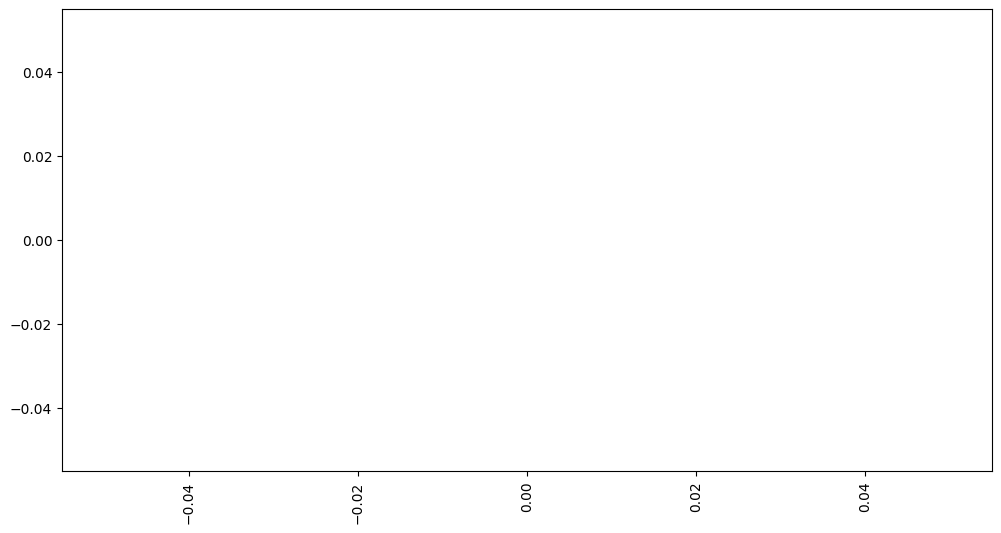

In [61]:
# Find and show the hourly trends in taxi pickups

df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour


hourly_pickups = df_clean['pickup_hour'].value_counts().sort_index()


# Create a bar plot
plt.figure(figsize=(12, 6))
hourly_pickups.plot(kind='bar')
plt.title('Taxi Pickups by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Pickups')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

for i, v in enumerate(hourly_pickups):
    plt.text(i, v, str(format(v, ',')), ha='center', va='bottom')

plt.tight_layout()
plt.show()



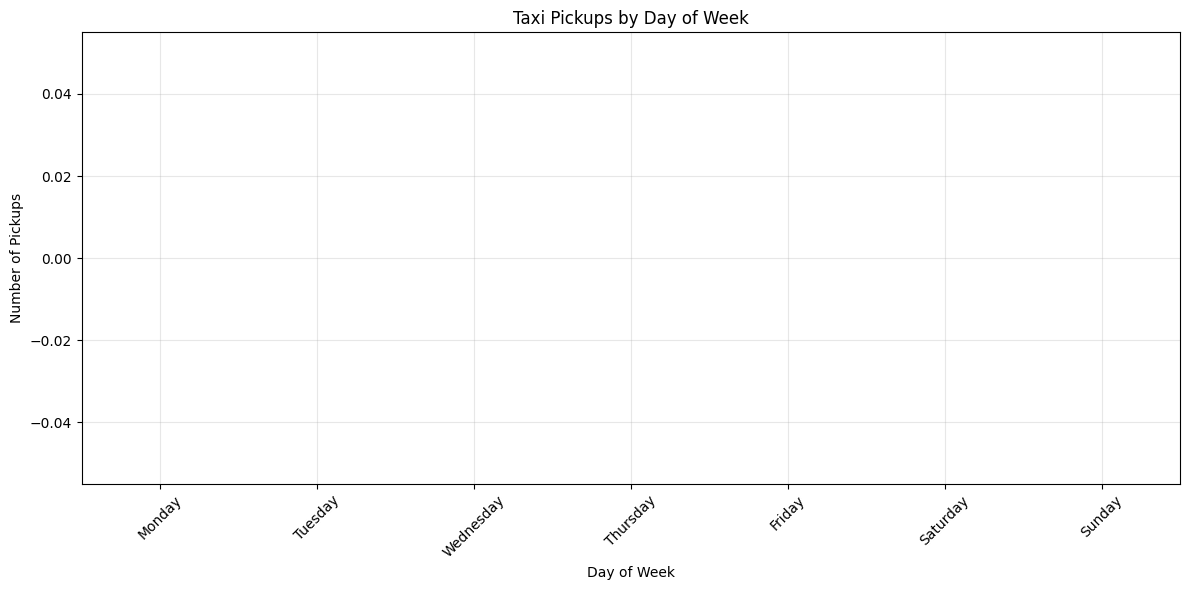

In [59]:
# Find and show the daily trends in taxi pickups (days of the week)

df_clean['pickup_day'] = df_clean['tpep_pickup_datetime'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = df_clean['pickup_day'].value_counts()
daily_pickups = daily_pickups.reindex(day_order)

# Create a bar plot
plt.figure(figsize=(12, 6))
daily_pickups.plot(kind='bar')
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)


for i, v in enumerate(daily_pickups):
    plt.text(i, v, str(format(v, ',')), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [ ]:
# Show the monthly trends in pickups
df_clean['pickup_month'] = df_clean['tpep_pickup_datetime'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = df_clean['pickup_month'].value_counts()
monthly_pickups = monthly_pickups.reindex(month_order)

# Create a bar plot
plt.figure(figsize=(14, 6))
monthly_pickups.plot(kind='bar')
plt.title('Taxi Pickups by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

for i, v in enumerate(monthly_pickups):
    plt.text(i, v, str(format(v, ',')), ha='center', va='bottom')

plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for param in params:
    print(f"\nAnalysis for {param}:")
    print("-" * 50)

    # Get basic statistics
    print("Basic statistics:")
    print(df_clean[param].describe())

    # Count zero values
    zero_count = len(df_clean[df_clean[param] == 0])
    zero_percent = (zero_count / len(df_clean)) * 100
    print(f"\nZero values: {zero_count:,} ({zero_percent:.2f}%)")

    # Count negative values
    neg_count = len(df_clean[df_clean[param] < 0])
    neg_percent = (neg_count / len(df_clean)) * 100
    print(f"Negative values: {neg_count:,} ({neg_percent:.2f}%)")


# Create box plots for visual distribution
plt.figure(figsize=(15, 5))
for i, param in enumerate(params, 1):
    plt.subplot(1, 4, i)
    plt.boxplot(df_clean[param])
    plt.title(f'Distribution of {param}')
    plt.xticks([])
plt.tight_layout()
plt.show()


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

ANSWER: It is not suitable to drop zeroes of cases where pickup and drop is in same zone.

In [ ]:
# Create a df with non zero entries for the selected parameters.
df_filtered = df_clean.copy()

financial_params = ['fare_amount', 'tip_amount', 'total_amount']

#before filter
print("Before filtering:")
print(f"Total number of records: {len(df_filtered):,}")
for param in financial_params:
    zero_count = len(df_filtered[df_filtered[param] == 0])
    print(f"Number of zero values in {param}: {zero_count:,}")

# Filter out zeros from financial parameters
for param in financial_params:
    df_filtered = df_filtered[df_filtered[param] > 0]

# Afterfilter
print("\nAfter filtering:")
print(f"Total number of records: {len(df_filtered):,}")

# Show statistics of the filtered dataset
print("\nStatistics of filtered dataset:")
print(df_filtered[financial_params + ['trip_distance']].describe())

# Show number of zero distance trips retained
zero_distance_trips = len(df_filtered[df_filtered['trip_distance'] == 0])


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue

# Group data by month and calculate revenue statistics
monthly_revenue = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.month_name())\
    ['total_amount'].agg(['sum', 'mean', 'count']).round(2)

# Rename columns for clarity
monthly_revenue.columns = ['Total Revenue', 'Average Fare', 'Number of Trips']

# Sort by month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(month_order)

# Create a figure with multiple subplots
plt.figure(figsize=(20, 10))

# 1. Line plot for total revenue trend
plt.subplot(2, 1, 1)
plt.plot(monthly_revenue.index, monthly_revenue['Total Revenue'] / 1000000,
         marker='o', linewidth=2, markersize=8)
plt.title('Monthly Total Revenue Trend (2023)')
plt.ylabel('Total Revenue (Millions $)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(monthly_revenue['Total Revenue']):
    plt.text(i, v/1000000, f'${v/1000000:.1f}M', ha='center', va='bottom')

# 2. Combined bar and line plot for average fare and number of trips
ax1 = plt.subplot(2, 1, 2)
ax2 = ax1.twinx()

# Bar plot for number of trips
bars = ax1.bar(monthly_revenue.index, monthly_revenue['Number of Trips'],
               alpha=0.3, color='lightblue')
ax1.set_ylabel('Number of Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for average fare
line = ax2.plot(monthly_revenue.index, monthly_revenue['Average Fare'],
                color='red', marker='o', linewidth=2, markersize=8)
ax2.set_ylabel('Average Fare ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Number of Trips vs Average Fare (2023)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter

df_filtered['quarter'] = df_filtered['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df_filtered.groupby('quarter')['total_amount'].sum()

quarterly_proportions = (quarterly_revenue / quarterly_revenue.sum() * 100).round(2)

# Create a pie chart
plt.figure(figsize=(12, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = [0.05] * 4


plt.pie(quarterly_proportions,
        explode=explode,
        labels=[f'Q{q}\n(${quarterly_revenue[q]:,.0f})' for q in range(1, 5)],
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.title('Revenue Distribution by Quarter (2023)')
plt.axis('equal')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance

# Create a new dataframe excluding zero distance trips
df_nonzero = df_filtered[df_filtered['trip_distance'] > 0]

# Calculate correlation
correlation = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])

# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=df_nonzero.sample(10000),  # Sample for better visualization
            x='trip_distance',
            y='fare_amount',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})

plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')

# Add correlation value to plot
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}',
         transform=plt.gca().transAxes,
         horizontalalignment='right',
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration
# Calculate trip duration in minutes
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60


correlation1 = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
sns.regplot(data=df_filtered.sample(10000),
            x='trip_duration',
            y='fare_amount',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.text(0.95, 0.95, f'Correlation: {correlation1:.2f}',
         transform=plt.gca().transAxes,
         horizontalalignment='right',
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))



In [ ]:
# Show relationship between fare and number of passengers

correlation2 = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])
sns.boxplot(data=df_filtered,
            x='passenger_count',
            y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.text(0.95, 0.95, f'Correlation: {correlation2:.2f}',
         transform=plt.gca().transAxes,
         horizontalalignment='right',
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))



In [ ]:
# Show relationship between tip and trip distance
correlation3 = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])
sns.regplot(data=df_filtered.sample(10000),
            x='trip_distance',
            y='tip_amount',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.text(0.95, 0.95, f'Correlation: {correlation3:.2f}',
         transform=plt.gca().transAxes,
         horizontalalignment='right',
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_types = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}

# Create a new column with payment type labels
df_filtered['payment_type_name'] = df_filtered['payment_type'].map(payment_types)

# Calculate the distribution
payment_dist = df_filtered['payment_type_name'].value_counts()
payment_pct = (df_filtered['payment_type_name'].value_counts(normalize=True) * 100).round(2)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# 1. Pie Chart
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
explode = [0.05] * len(payment_dist)  # Slight explosion for all slices

ax1.pie(payment_pct,
        labels=[f'{name}\n({count:,} rides)' for name, count in payment_dist.items()],
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        shadow=True)
ax1.set_title('Distribution of Payment Types')

# 2. Bar Plot with value labels
bars = ax2.bar(payment_dist.index, payment_dist.values, color=colors)
ax2.set_title('Number of Rides by Payment Type')
ax2.set_ylabel('Number of Rides')
ax2.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
# zones = # read the .shp file using gpd


# Import required libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
zones = gpd.read_file('/content/taxi_zones.shp')
zones.head()
# Create a figure with larger size
plt.figure(figsize=(15, 15))

# Plot the taxi zones
zones.plot(figsize=(15, 15),
                edgecolor='black',
                facecolor='lightgrey',
                alpha=0.7)

# Add title and remove axes
plt.title('NYC Taxi Zones', fontsize=15)
plt.axis('off')

# Show the plot
plt.show()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

# First, check if zones data is loaded, if not, load it
# First, check if zones data is loaded, if not, load it
if 'zones' not in locals():
    zones = gpd.read_file('Taxi Zones/taxi_zones.shp')

# First, rename the location ID column in zones to match with PULocationID
zones = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge trip data with zones for pickup locations
merged_data = df_filtered.merge(zones[['PULocationID', 'zone', 'borough', 'geometry']],
                               on='PULocationID',
                               how='left')

# Rename columns to indicate they're for pickup locations
merged_data = merged_data.rename(columns={
    'zone': 'pickup_zone',
    'borough': 'pickup_borough'
})

# Now merge for dropoff locations (first rename PULocationID back to LocationID for second merge)
zones = zones.rename(columns={'PULocationID': 'DOLocationID'})
merged_data = merged_data.merge(zones[['DOLocationID', 'zone', 'borough']],
                               on='DOLocationID',
                               how='left')

# Rename columns to indicate they're for dropoff locations
merged_data = merged_data.rename(columns={
    'zone': 'dropoff_zone',
    'borough': 'dropoff_borough'
})

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry='geometry', crs=zones.crs)

# Display information about the merged dataset
print("Merged data information:")
print("-" * 50)
print(f"Total number of trips: {len(gdf):,}")
print("\nSample of merged data:")
print(gdf[['pickup_zone', 'pickup_borough', 'dropoff_zone', 'dropoff_borough']].head())

# Check for any unmatched locations
unmatched_pickups = gdf[gdf['pickup_zone'].isna()]['PULocationID'].unique()
unmatched_dropoffs = gdf[gdf['dropoff_zone'].isna()]['DOLocationID'].unique()

print("\nUnmatched Locations:")
print(f"Number of unmatched pickup locations: {len(unmatched_pickups)}")
print(f"Number of unmatched dropoff locations: {len(unmatched_dropoffs)}")

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on the NYC taxi data analysis, here are the key optimization recommendations:

1. **Time & Location Management**
- Optimize fleet distribution based on peak hours and high-demand zones
- Focus on busy areas like business districts and airports
- Implement dynamic pricing for underserved areas

2. **Operational Efficiency**
- Reduce empty returns by smart trip matching
- Position vehicles strategically near major events and transport hubs
- Develop borough-specific strategies for better coverage

3. **Technology & Service**
- Use predictive analytics for demand forecasting
- Implement real-time traffic monitoring
- Improve driver-passenger matching through mobile apps

4. **Resource Optimization**
- Align driver shifts with demand patterns
- Create flexible response systems for surge periods
- Maintain service quality during peak hours while reducing idle time

These strategies aim to maximize efficiency, improve customer service, and increase revenue while reducing operational costs.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Based on the analysis of NYC taxi trip patterns, here are key suggestions for strategic cab positioning:

1. **Peak Hour Positioning**
- Position more cabs in business districts during weekday rush hours (8-10 AM, 4-7 PM)
- Increase airport coverage during typical flight arrival times
- Maintain higher presence in entertainment districts during evening hours and weekends

2. **Seasonal Adjustments**
- Increase coverage in tourist areas during peak tourist seasons
- Adjust positioning based on weather patterns (more cabs in covered/sheltered areas during rain)
- Modify distribution during special events and holidays

3. **Zone-Based Strategy**
- Focus on high-demand zones identified in the analysis (particularly in Manhattan)
- Create strategic waiting points between busy zones to reduce empty trips
- Maintain flexible fleet distribution that can quickly respond to demand shifts

These positioning strategies should help maximize efficiency and revenue while minimizing idle time and empty trips.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Here are data-driven pricing strategy recommendations based on the NYC taxi analysis:

1. **Dynamic Pricing**
- Implement surge pricing during peak demand hours
- Adjust rates based on real-time demand in different zones
- Higher rates for high-traffic routes identified in the analysis

2. **Time-Based Pricing**
- Premium rates during rush hours (8-10 AM, 4-7 PM)
- Discounted rates during low-demand periods to stimulate usage
- Special rates for late-night services when public transport is limited

3. **Zone-Based Rates**
- Higher base fares in high-demand zones
- Incentivize drivers with better rates for underserved areas
- Special airport and inter-borough rates based on distance and demand

4. **Competitive Adjustments**
- Monitor and match competitor rates during off-peak hours
- Offer loyalty programs for regular customers
- Premium service options for business districts and special events

These adjustments aim to optimize revenue while maintaining market competitiveness and service quality.
